In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing

# Load the uploaded CSV file
file_path = /content/Crop_recommendation.csv

# Read the CSV file
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

# Check column names and data types
print(df.info())

# Assuming the dataset contains a time column, check if a suitable datetime column exists
# Modify 'Date' to the correct column name if needed
date_column = 'Date'  # Change this based on your dataset
if date_column in df.columns:
    df[date_column] = pd.to_datetime(df[date_column])  # Convert to datetime format
    df.set_index(date_column, inplace=True)  # Set it as the index
else:
    print("Please specify the correct time column in your dataset.")

# Choose a numerical column for time series analysis (modify as needed)
target_column = 'temperature'  # Change this to a valid column name

# Plot the original time series data
plt.figure(figsize=(12, 5))
plt.plot(df[target_column], label='Original Data', color='blue')
plt.title('Original Time Series Data')
plt.xlabel('Time')
plt.ylabel(target_column)
plt.legend()
plt.show()

# ----- Aggregation: Monthly Mean (Modify based on available granularity) -----
df_monthly = df.resample('M').mean()

plt.figure(figsize=(12, 5))
plt.plot(df_monthly[target_column], label='Aggregated (Monthly Mean)', color='orange')
plt.title('Aggregated (Monthly Mean) Time Series')
plt.xlabel('Time')
plt.ylabel(target_column)
plt.legend()
plt.show()

# ----- Smoothing: Moving Average -----
window_size = 5  # Define window size
df['Moving_Avg'] = df[target_column].rolling(window=window_size).mean()

plt.figure(figsize=(12, 5))
plt.plot(df[target_column], label='Original Data', alpha=0.5)
plt.plot(df['Moving_Avg'], label='Moving Average', color='red')
plt.title('Moving Average Smoothing')
plt.xlabel('Time')
plt.ylabel(target_column)
plt.legend()
plt.show()

# ----- Smoothing: Exponential Smoothing -----
alpha = 0.3  # Smoothing factor (adjustable)
exp_smooth = SimpleExpSmoothing(df[target_column].dropna()).fit(smoothing_level=alpha, optimized=False)
df['Exp_Smooth'] = exp_smooth.fittedvalues

plt.figure(figsize=(12, 5))
plt.plot(df[target_column], label='Original Data', alpha=0.5)
plt.plot(df['Exp_Smooth'], label='Exponentially Smoothed', color='green')
plt.title('Exponential Smoothing')
plt.xlabel('Time')
plt.ylabel(target_column)
plt.legend()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/Crop_recommendation.csv'

Saving Crop_recommendation.csv to Crop_recommendation (1).csv
First 5 rows of the dataset:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label    

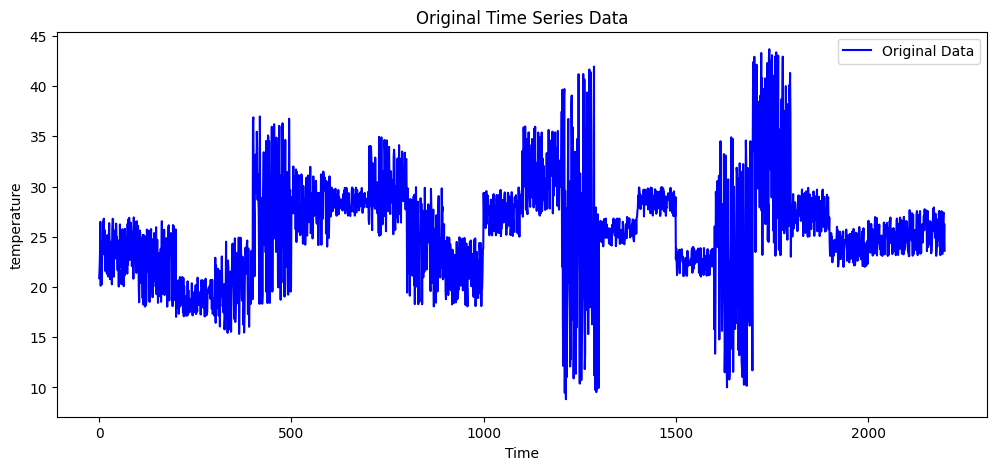

<ipython-input-2-0394dcd8489a>:49: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import SimpleExpSmoothing
from google.colab import files
import io

# Upload the CSV file manually
uploaded = files.upload()

# Get the filename dynamically
file_name = list(uploaded.keys())[0]

# Load the dataset
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

# Display basic info
print("First 5 rows of the dataset:")
print(df.head())

# Check the structure of the dataset
print("\nDataset Info:")
print(df.info())

# Identify the date column (Modify this based on your dataset)
date_column = 'Date'  # Change this to the actual datetime column in your dataset
if date_column in df.columns:
    df[date_column] = pd.to_datetime(df[date_column])  # Convert to datetime
    df.set_index(date_column, inplace=True)  # Set as index
else:
    print("\n⚠️ Please specify the correct datetime column!")

# Choose a numerical column for trend analysis (Change if necessary)
target_column = 'temperature'  # Modify based on your dataset
if target_column not in df.columns:
    print("\n⚠️ Please check and update the 'target_column' with a valid numerical column!")
else:
    # ---- 1️⃣ Plot Original Time Series ----
    plt.figure(figsize=(12, 5))
    plt.plot(df[target_column], label='Original Data', color='blue')
    plt.title('Original Time Series Data')
    plt.xlabel('Time')
    plt.ylabel(target_column)
    plt.legend()
    plt.show()

    # ---- 2️⃣ Aggregation: Monthly Mean ----
    df_monthly = df.resample('M').mean()
    plt.figure(figsize=(12, 5))
    plt.plot(df_monthly[target_column], label='Aggregated (Monthly Mean)', color='orange')
    plt.title('Aggregated (Monthly Mean) Time Series')
    plt.xlabel('Time')
    plt.ylabel(target_column)
    plt.legend()
    plt.show()

    # ---- 3️⃣ Smoothing: Moving Average ----
    window_size = 5
    df['Moving_Avg'] = df[target_column].rolling(window=window_size).mean()
    plt.figure(figsize=(12, 5))
    plt.plot(df[target_column], label='Original Data', alpha=0.5)
    plt.plot(df['Moving_Avg'], label='Moving Average', color='red')
    plt.title('Moving Average Smoothing')
    plt.xlabel('Time')
    plt.ylabel(target_column)
    plt.legend()
    plt.show()

    # ---- 4️⃣ Smoothing: Exponential Smoothing ----
    alpha = 0.3  # Adjust smoothing factor
    exp_smooth = SimpleExpSmoothing(df[target_column].dropna()).fit(smoothing_level=alpha, optimized=False)
    df['Exp_Smooth'] = exp_smooth.fittedvalues
    plt.figure(figsize=(12, 5))
    plt.plot(df[target_column], label='Original Data', alpha=0.5)
    plt.plot(df['Exp_Smooth'], label='Exponentially Smoothed', color='green')
    plt.title('Exponential Smoothing')
    plt.xlabel('Time')
    plt.ylabel(target_column)
    plt.legend()
    plt.show()


Saving Crop_recommendation.csv to Crop_recommendation (2).csv
First 5 rows of the dataset:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

⚠️ No valid Date column found! Using default index instead.


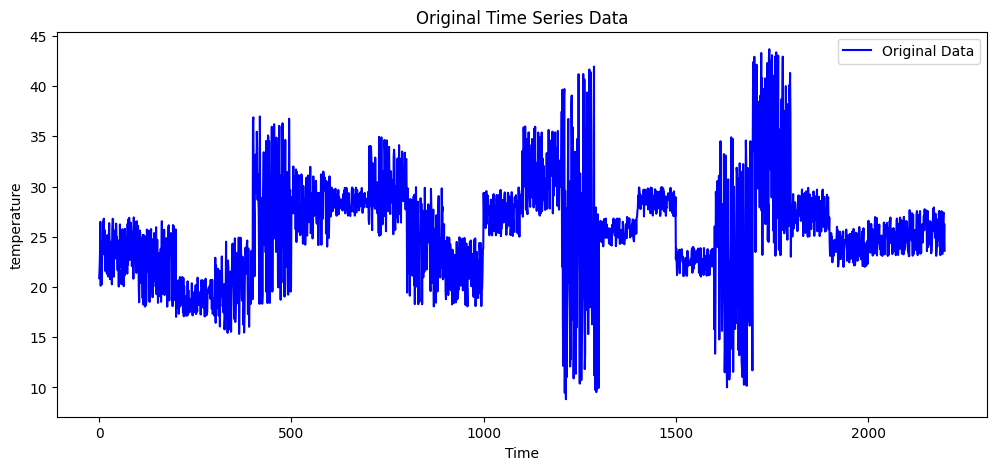

TypeError: agg function failed [how->mean,dtype->object]

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import SimpleExpSmoothing
from google.colab import files
import io

# Upload the CSV file manually
uploaded = files.upload()

# Get the filename dynamically
file_name = list(uploaded.keys())[0]

# Load the dataset
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Identify if there is a Date column
date_columns = [col for col in df.columns if 'date' in col.lower()]
if date_columns:
    date_column = date_columns[0]  # Select the first matching column
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')  # Convert to datetime
    df.set_index(date_column, inplace=True)  # Set as index
    print(f"\n✅ Using '{date_column}' as the Date column.")
else:
    print("\n⚠️ No valid Date column found! Using default index instead.")

# Choose a numerical column for trend analysis (Modify if needed)
target_column = 'temperature'  # Change this based on your dataset
if target_column not in df.columns:
    print("\n⚠️ Please provide a valid numerical column for analysis.")
else:
    # ---- 1️⃣ Plot Original Time Series ----
    plt.figure(figsize=(12, 5))
    plt.plot(df[target_column], label='Original Data', color='blue')
    plt.title('Original Time Series Data')
    plt.xlabel('Time')
    plt.ylabel(target_column)
    plt.legend()
    plt.show()

    # ---- 2️⃣ Aggregation: Monthly Mean (Handles Non-Date Data) ----
    if date_columns:
        df_monthly = df.resample('ME').mean()
    else:
        df_monthly = df.groupby(df.index // 30).mean()  # Approximate monthly grouping if no Date column

    plt.figure(figsize=(12, 5))
    plt.plot(df_monthly[target_column], label='Aggregated (Monthly Mean)', color='orange')
    plt.title('Aggregated (Monthly Mean) Time Series')
    plt.xlabel('Time')
    plt.ylabel(target_column)
    plt.legend()
    plt.show()

    # ---- 3️⃣ Smoothing: Moving Average ----
    window_size = 5
    df['Moving_Avg'] = df[target_column].rolling(window=window_size, min_periods=1).mean()
    plt.figure(figsize=(12, 5))
    plt.plot(df[target_column], label='Original Data', alpha=0.5)
    plt.plot(df['Moving_Avg'], label='Moving Average', color='red')
    plt.title('Moving Average Smoothing')
    plt.xlabel('Time')
    plt.ylabel(target_column)
    plt.legend()
    plt.show()

    # ---- 4️⃣ Smoothing: Exponential Smoothing ----
    alpha = 0.3  # Adjust smoothing factor
    exp_smooth = SimpleExpSmoothing(df[target_column].dropna()).fit(smoothing_level=alpha, optimized=False)
    df['Exp_Smooth'] = exp_smooth.fittedvalues
    plt.figure(figsize=(12, 5))
    plt.plot(df[target_column], label='Original Data', alpha=0.5)
    plt.plot(df['Exp_Smooth'], label='Exponentially Smoothed', color='green')
    plt.title('Exponential Smoothing')
    plt.xlabel('Time')
    plt.ylabel(target_column)
    plt.legend()
    plt.show()


Saving Crop_recommendation.csv to Crop_recommendation (3).csv
First 5 rows of the dataset:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

✅ Selected 'N' for time series analysis.


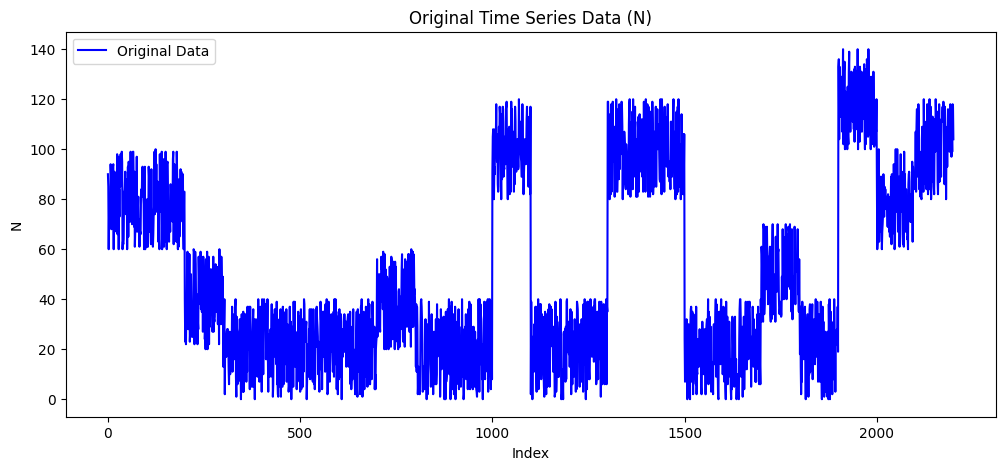

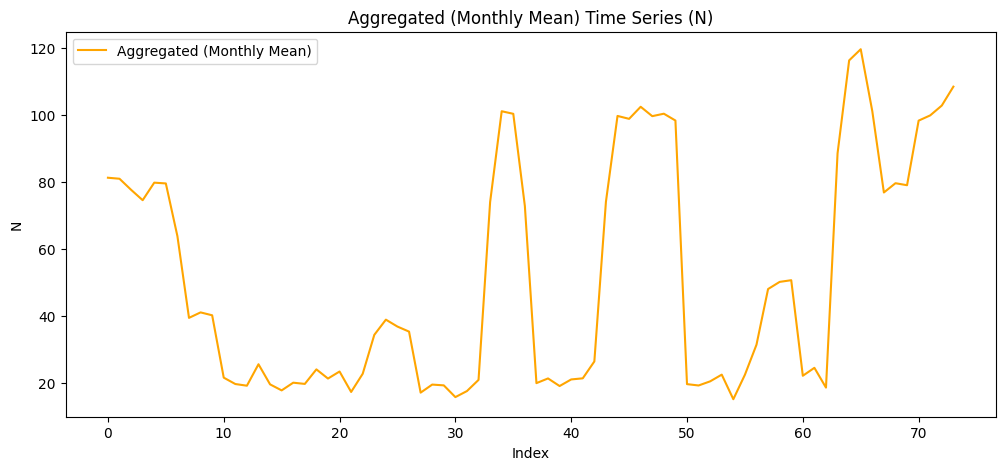

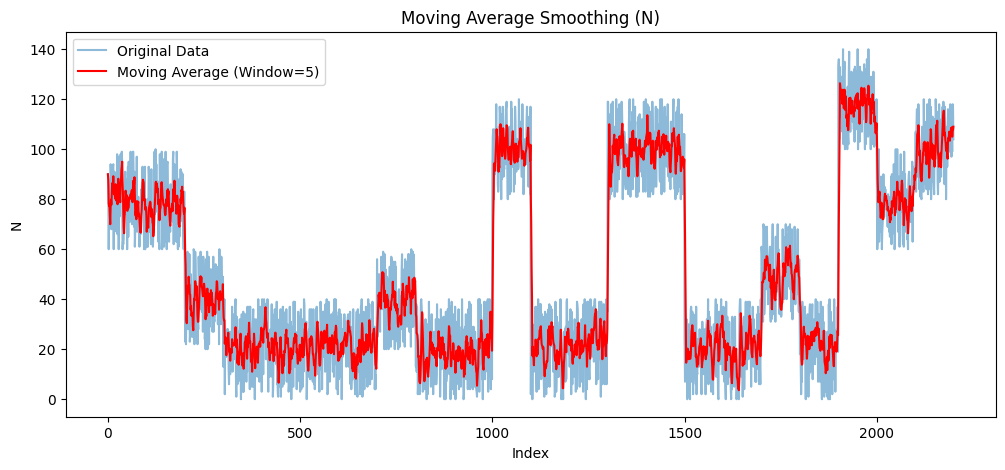

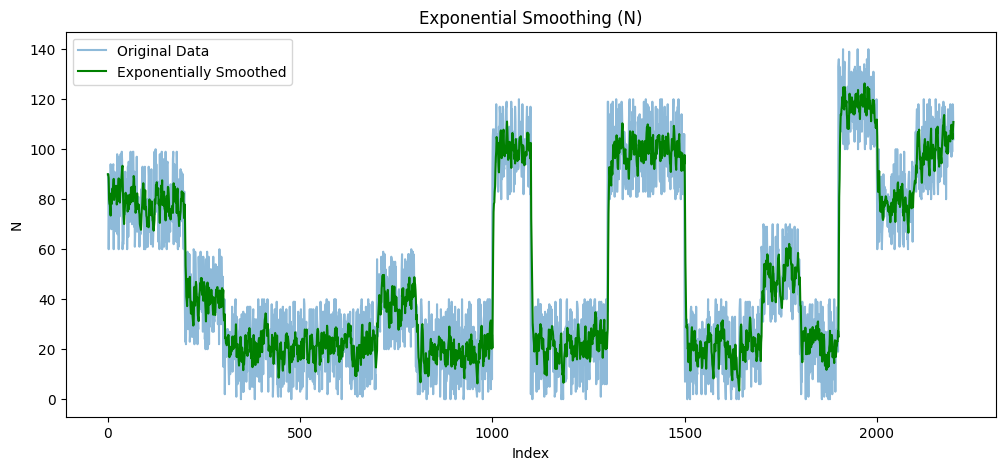

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import SimpleExpSmoothing
from google.colab import files
import io

# Upload the CSV file manually
uploaded = files.upload()

# Get the filename dynamically
file_name = list(uploaded.keys())[0]

# Load the dataset
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Identify numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if not numeric_cols:
    print("\n❌ No numeric columns found in the dataset! Please check the file.")
else:
    target_column = numeric_cols[0]  # Select the first numeric column for trend analysis
    print(f"\n✅ Selected '{target_column}' for time series analysis.")

    # ---- 1️⃣ Plot Original Time Series ----
    plt.figure(figsize=(12, 5))
    plt.plot(df[target_column], label='Original Data', color='blue')
    plt.title(f'Original Time Series Data ({target_column})')
    plt.xlabel('Index')
    plt.ylabel(target_column)
    plt.legend()
    plt.show()

    # ---- 2️⃣ Aggregation: Monthly Mean (Handles Non-Date Data) ----
    df['Index'] = np.arange(len(df))  # Create an index if no Date column exists
    df_monthly = df.groupby(df['Index'] // 30).mean(numeric_only=True)  # Approximate monthly grouping

    plt.figure(figsize=(12, 5))
    plt.plot(df_monthly[target_column], label='Aggregated (Monthly Mean)', color='orange')
    plt.title(f'Aggregated (Monthly Mean) Time Series ({target_column})')
    plt.xlabel('Index')
    plt.ylabel(target_column)
    plt.legend()
    plt.show()

    # ---- 3️⃣ Smoothing: Moving Average ----
    window_size = 5
    df['Moving_Avg'] = df[target_column].rolling(window=window_size, min_periods=1).mean()

    plt.figure(figsize=(12, 5))
    plt.plot(df[target_column], label='Original Data', alpha=0.5)
    plt.plot(df['Moving_Avg'], label=f'Moving Average (Window={window_size})', color='red')
    plt.title(f'Moving Average Smoothing ({target_column})')
    plt.xlabel('Index')
    plt.ylabel(target_column)
    plt.legend()
    plt.show()

    # ---- 4️⃣ Smoothing: Exponential Smoothing ----
    alpha = 0.3  # Adjust smoothing factor
    exp_smooth = SimpleExpSmoothing(df[target_column].dropna()).fit(smoothing_level=alpha, optimized=False)
    df['Exp_Smooth'] = exp_smooth.fittedvalues

    plt.figure(figsize=(12, 5))
    plt.plot(df[target_column], label='Original Data', alpha=0.5)
    plt.plot(df['Exp_Smooth'], label='Exponentially Smoothed', color='green')
    plt.title(f'Exponential Smoothing ({target_column})')
    plt.xlabel('Index')
    plt.ylabel(target_column)
    plt.legend()
    plt.show()
